# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
#importing all the necessary libraries 
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

#mnist is the data base (contains labled dataset)
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#Loading the training and test sets to X_train, y_train and X_test and y_test
#Respectively from mnist data base
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


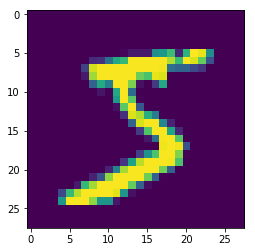

In [37]:
#Print the training data using matplot library,
#matplotlib inline is needed when we run using browser
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline

#See the share of first image
plt.imshow(X_train[0])

In [0]:
#Kears need (n, width, hight, depth) mnist have only (n, w, h) in mnist
#we know its a Grey scale so we keep depth as 1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#convert our data type to float32 
#Normalize values to the range [0, 1].
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [41]:
#Print 10 values of training dataset
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [43]:
#print the training data set after converting 1-D array to 10-D array
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
from keras.layers import Activation
#Declare the sequential keras model
model = Sequential()

#we are adding the first convolution layer with input of (w,h,d)
#32 = numer of convolutions(kernels), 3,3 is row col of kernels so its 3*3
#Activation = 'relu' this will be used to normalise the values between 0-1
#Receptive field of this layer = 3*3 input channel = 28*28*1
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Convolution2D(12, 3, 3, activation='relu'))  #24
model.add(Convolution2D(12, 3, 3, activation='relu'))  #22
model.add(Convolution2D(16, 1, activation='relu'))     #22
model.add(MaxPooling2D(pool_size=(2, 2)))              #11
model.add(Convolution2D(12, 3, 3, activation='relu'))  #9
model.add(Convolution2D(12, 3, 3, activation='relu'))  #7
model.add(Convolution2D(16, 3, 3, activation='relu'))  #5
model.add(Convolution2D(10, 5, 5))                     #1

#result should be converted back to 1-D array, to show as 0-9
model.add(Flatten())
model.add(Activation('softmax'))

#will give the summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 12)        1308      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 22, 12)        1308      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 22, 22, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 9, 9, 12)          1740      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 12)          1308      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  from ipy

In [0]:
# this is to compile the model 
#NOTE: we can use different loss function and optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [46]:
#Here we diclared batch size of 16 so 10000/16 batches + declared 20 epoch
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3701 - acc: 0.8825
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1040 - acc: 0.9681
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0772 - acc: 0.9763
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0635 - acc: 0.9802
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0509 - acc: 0.9842
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0462 - acc: 0.9861
Epoch 7/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0423 - acc: 0.9875
Epoch 8/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0374 - acc: 0.9884
Epoch 9/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0343 - acc: 0.9893
Epoch 10/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0316 - acc: 0.9902

In [0]:
#evaluate the model 
score = model.evaluate(X_test, Y_test, verbose=0)

In [49]:
#print the score
print(score)

[0.03758621521629684, 0.9896]


In [0]:
#Predict the number present in X_test 
y_pred = model.predict(X_test)

In [51]:
#y_pred is predected value y_test is actual test value.
print(y_pred[:9])
print(y_test[:9])

[[7.94163867e-12 8.28188795e-10 1.46893868e-07 2.18741138e-06
  8.30955721e-11 4.07013268e-09 2.04779231e-18 9.99997497e-01
  1.72121067e-10 1.54400425e-07]
 [3.56944446e-10 5.37399236e-09 9.99999881e-01 3.45701983e-13
  9.49205233e-13 3.78373938e-12 7.07840115e-08 1.93616688e-13
  2.05155771e-11 3.64713481e-14]
 [9.91446303e-09 9.99969959e-01 3.15744865e-06 2.34183811e-10
  5.12334464e-06 4.92327263e-06 8.95294875e-07 4.21492314e-06
  1.17492145e-05 2.11189466e-08]
 [9.99934077e-01 2.31884609e-10 1.89096994e-07 3.41648754e-09
  1.37659825e-07 8.64465346e-06 5.43534406e-05 2.32506551e-07
  4.88217289e-09 2.23885195e-06]
 [1.06608633e-09 4.23867157e-11 8.97358750e-12 2.46445110e-16
  9.99999642e-01 4.15070289e-09 8.97168473e-09 1.73259448e-10
  8.98721431e-10 3.85484498e-07]
 [3.01117176e-09 9.99979854e-01 1.20669927e-06 2.90252024e-11
  1.10478268e-05 4.28294328e-07 9.77031789e-08 5.55281804e-06
  1.79905373e-06 1.89561646e-08]
 [1.11999712e-16 2.51886334e-09 1.64563144e-12 4.29256890e